**Zad 1.**

In [2]:
import numpy as np
import functools,operator
def lagrange(x,y):
    product=lambda z,i : functools.reduce(operator.mul,[(z-x[j])/(x[i]-x[j]) for j in range(0,len(x)) if i!=j])
    result=lambda z: sum ([product(z,i)*y[i] for i in range (0,len(x))])
    return result

fun1=lagrange([1,2,3,4,12],[5,7,6,9,11])
print(fun1(10))

118.89090909090912


**Zad 2.**

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RankWarning: Polyfit may be poorly conditioned


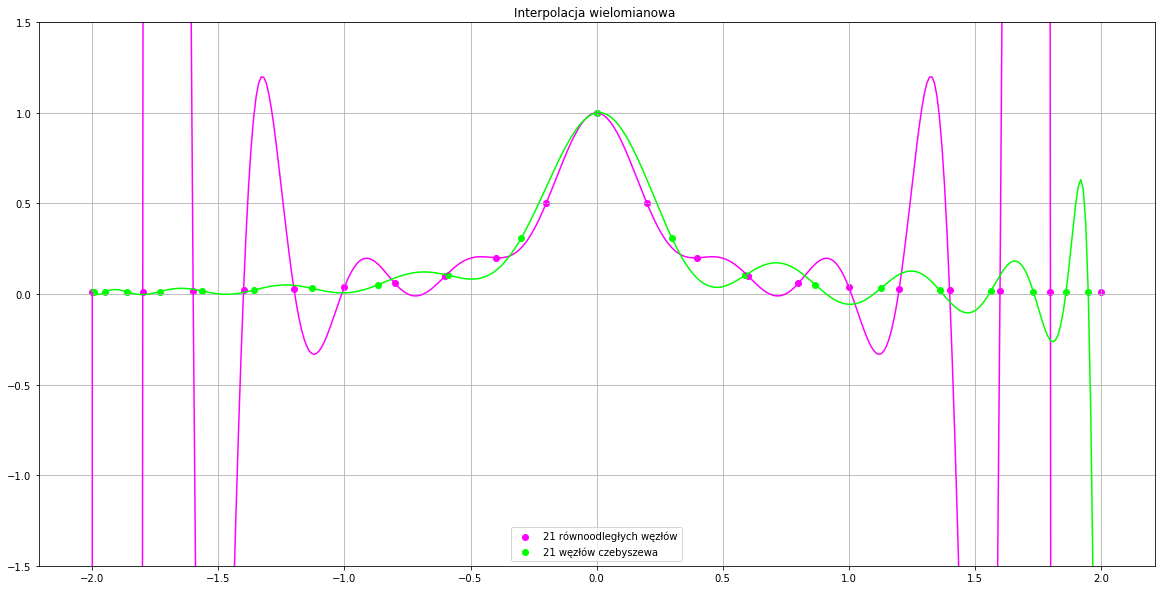

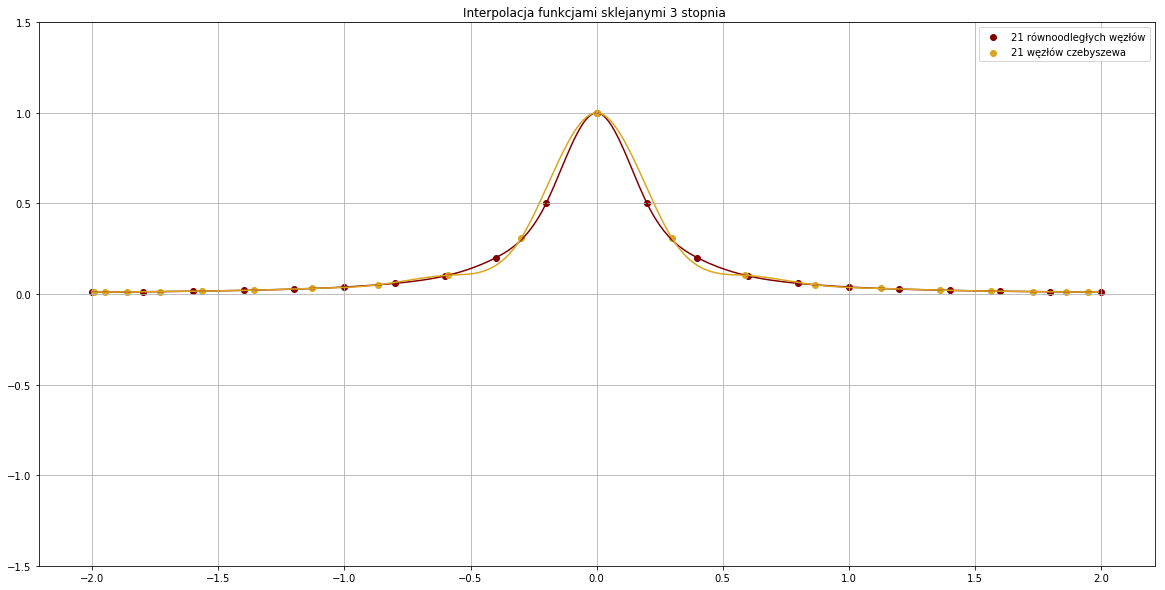

Przy interpolacji wielomianowej  dla węzłów równodległych występuje efekt Rungego. Jednak przy tej samej metodzie
używając węzłów Czebyszewa problem ten nie występuje gdyż są one specjalnie przystosowane aby ten problem nie wystąpił
 Natomiast w przypadku interoplacji funkcjami sklejanymi dany problem nie występuje.


In [4]:
import matplotlib.pyplot as plt
import math,scipy,numpy
import scipy.interpolate
from numpy import array
from scipy.interpolate import interp1d

f = lambda x: 1/(25*x**2 +1)

x = numpy.arange(-2,2,0.01)
wezly=scipy.linspace(-2,2,21)

start=-2
end=2
n=21
czebyszew = array([(start + end) / 2 + (end - start) / 2 * math.cos(math.pi * (2 * k + 1) / (2 * n)) for k in range(1, n)])

#inter_w=[lagrange(wezly,yw)(k) for k in wezly]
#inter_c=[lagrange(czebyszew,yc)(k) for k in czebyszew]

#sklej_w = interp1d(wezly, f(wezly), 3, fill_value='extrapolate')
#sklej_c = interp1d(czebyszew, f(czebyszew), 3, fill_value='extrapolate')

#sklej_w=scipy.interpolate.InterpolatedUnivariateSpline(wezly,yw,k=3)
#sklej_c=scipy.interpolate.InterpolatedUnivariateSpline(czebyszew,yc,k=3)

#inter_w=scipy.interpolate.lagrange(wezly,f(wezly))
#inter_c=scipy.interpolate.lagrange(czebyszew,f(czebyszew))

#przepraszam za bałagan, ale to backup na wypadek gdyby obecny pomysł okazał się błędny 

inter_w=np.poly1d(np.polyfit(wezly,f(wezly),deg=20))         #wbudowane fukncje interpolujace
inter_c=np.poly1d(np.polyfit(czebyszew,f(czebyszew),deg=20))

funkc_w=interp1d(wezly,f(wezly),3,fill_value='extrapolate')
funkc_c=interp1d(czebyszew,f(czebyszew),3,fill_value='extrapolate')

plt.figure(figsize=(20,10))
plt.ylim(-1.5,1.5)
plt.title('Interpolacja wielomianowa ')

plt.plot(x,inter_w(x), color="magenta")
plt.plot(x, inter_c(x), color="lime")
plt.scatter(wezly,inter_w(wezly),color="magenta",label='21 równoodległych węzłów')
plt.scatter(czebyszew,inter_c(czebyszew),color="lime",label='21 węzłów czebyszewa')

plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(20,10))
plt.ylim(-1.5,1.5)
plt.title('Interpolacja funkcjami sklejanymi 3 stopnia ')

plt.plot(x,funkc_w(x), color="maroon")
plt.plot(x, funkc_c(x), color="goldenrod")
plt.scatter(wezly,funkc_w(wezly),color="maroon",label='21 równoodległych węzłów')
plt.scatter(czebyszew,funkc_c(czebyszew),color="goldenrod",label='21 węzłów czebyszewa')

plt.legend()
plt.grid()
plt.show()
#print(wezly)
#print(czebyszew)
print('Przy interpolacji wielomianowej  dla węzłów równodległych występuje efekt Rungego. Jednak przy tej samej metodzie\nużywając węzłów Czebyszewa problem ten nie występuje gdyż są one specjalnie przystosowane aby ten problem nie wystąpił')
print(' Natomiast w przypadku interoplacji funkcjami sklejanymi dany problem nie występuje.')

**Zad 3.**

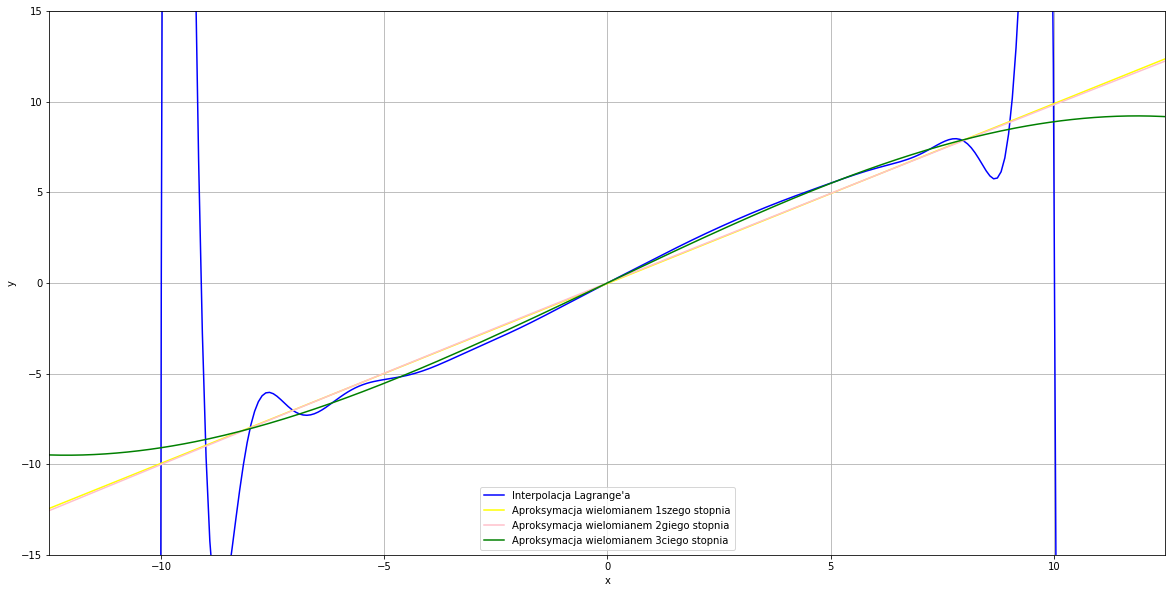

In [4]:
napiecie = array([x for x in range(-10, 11)])
predkosc = array([-9.1, -8.82, -7.99, -7.1, -6.32, -5.33, -4.73, -3.65, -2.53, -1.28, 
                  0.0, 1.26, 2.49, 3.61, 4.61, 5.51, 6.32, 7.1, 7.81, 8.45, 9.02])

#print(napiecie)
#print(predkosc)

inter=scipy.interpolate.lagrange(napiecie,predkosc)

x=scipy.linspace(-12.5,12.5,300)

wielomian1=numpy.poly1d(numpy.polyfit(napiecie,predkosc,1))
wielomian2=numpy.poly1d(numpy.polyfit(napiecie,predkosc,2))
wielomian3=numpy.poly1d(numpy.polyfit(napiecie,predkosc,3))


plt.figure(figsize=(20,10))

plt.plot(x,inter(x), label='Interpolacja Lagrange\'a', color="blue")
plt.plot(x,wielomian1(x), label='Aproksymacja wielomianem 1szego stopnia',color="yellow")
plt.plot(x,wielomian2(x), label='Aproksymacja wielomianem 2giego stopnia',color="pink")
plt.plot(x,wielomian3(x), label='Aproksymacja wielomianem 3ciego stopnia',color="green")

plt.ylim(-15,15)
plt.xlim(-12.5,12.5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

print('Interpolacja tonprzybliżanie funkcji za pomocą funkcji z pewnej klasy, np. wielomianami, funkcjami trygonometrycznymi itp. Znane są dokładne wartości funkcji w punktach węzłowych. \n Funkcja aproksymująca nie musi wcale przyjmować identycznych wartości jak funkcja aproksymowana.')

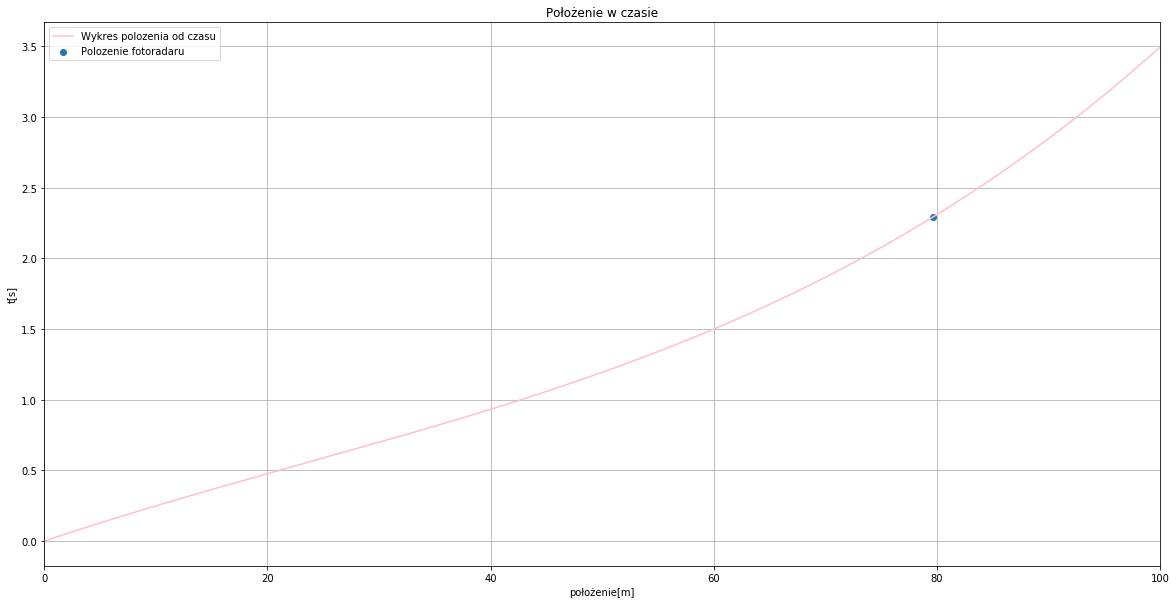

Kierowca minął fotoraadar w  2.2916950833167666  sekundzie pomiaru, jadąc  21.6755580776678 m/s


In [16]:
from scipy.misc import derivative
t=[0,1,2,3]
p=[0.0,42.7,73.2,92.5]

inter=lagrange(p,t)

radar_v=derivative(lagrange(t,p),radar)

x = scipy.linspace(0, 100, 10000)

plt.figure(figsize=(20,10))
plt.xlim(0,100)
plt.plot(x, inter(x),label='Wykres polozenia od czasu',color="pink")
plt.scatter(79.6,inter(79.6),label='Polozenie fotoradaru')
plt.title('Położenie w czasie')
plt.xlabel('położenie[m]')
plt.ylabel('t[s]')
plt.grid()
plt.legend()
plt.show()

print('Kierowca minął fotoraadar w ',inter(79.6),' sekundzie pomiaru, jadąc ',radar_v,'m/s')